In [13]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v2.0.1/"
geo_model = gp.create_model("StratBR_BES_v2.0.0")

## Step by step

In [14]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -20000, 5000],
    resolution=[50, 50, 50],
    path_i=data_path + "sp_89_lessgrid_holder.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


StratBR_BES_v2.0.0  2023-09-19 13:12

In [15]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,bes_89,Default series,1,#015482,1
1,holder,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [16]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes_89", "holder"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes_89,Strat_Series,1,#015482,1
1,holder,Strat_Series,2,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


In [17]:
"""# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes_89"),
        "Strat_Series_2": ("holder"),
        "Basement_series": ("basement",),
    },
)"""

'# Ordenando as surfaces (Estratigrafia (topo para base)) 3\ngp.map_stack_to_surfaces(\n    geo_model,\n    {\n        "Strat_Series": ("bes_89"),\n        "Strat_Series_2": ("holder"),\n        "Basement_series": ("basement",),\n    },\n)'

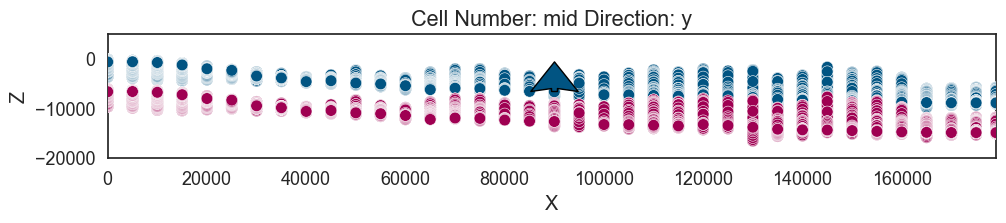

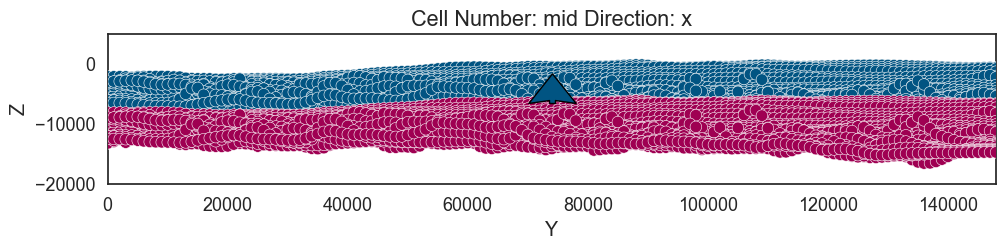

In [18]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=1, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [19]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=2,
)

In [20]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                233602.226017
$C_o$            1299285714.285714
drift equations             [3, 3]
CPU times: total: 17 s
Wall time: 17.5 s


In [21]:
"""%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)"""

'%%time\ngp.set_interpolator(\n    geo_model, \n    output=[\'geology\'], \n    compile_theano=True, \n    theano_optimizer=\'fast_run\', # fast_compile, fast_run\n    dtype="float64",  # for model stability\n    verbose=[]\n)'

In [22]:
%%time
sol=gp.compute_model(geo_model, compute_mesh=True)

CPU times: total: 31min 33s
Wall time: 6min 57s


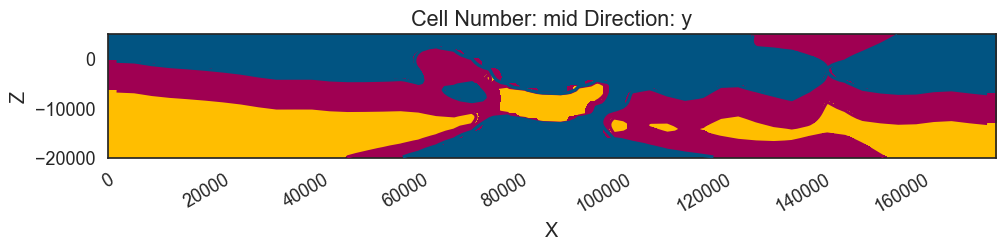

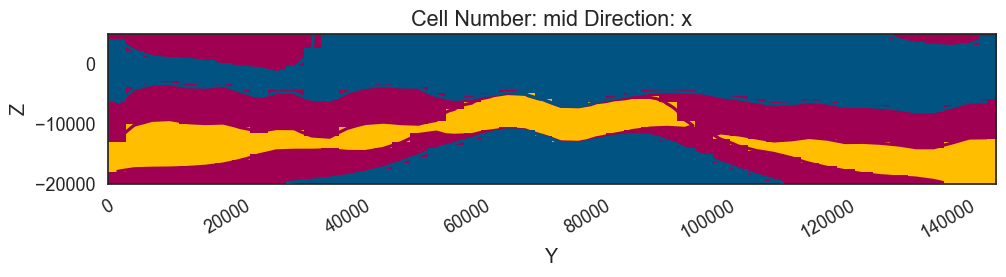

In [23]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=1,
    legend=True,
)

In [24]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=1)

In [25]:
"""topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)"""

'topo_init = tp.compute_topology(\n    geo_model, direction="x", voxel_threshold=1\n)  # , direction="Y", cell_number=15)\nedges_init, centroids_init = tp.clean_unconformity_topology(\n    geo_model, 1, topo_init[0], topo_init[1]\n)'

In [26]:
"""# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)"""

'# Seção transversal do modelo\ngp.plot_2d(\n    geo_model,\n    direction="y",\n    show_data=False,\n    show_lith=True,\n    ve=1,\n)\ngp.plot.plot_topology(geo_model, edges_init, centroids_init)'

In [27]:
"""# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)"""

'# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)\ngp.save_model(\n    geo_model,\n    path="../../../output/",\n    compress=True,\n)'